# Анализ компьютерных игр в интернет-магазине "Стримчик"

Из открытых источников доступны исторические данные Интернет-магазина «Стримчик», который продаёт по всему миру компьютерные игры, о продажах игр, оценки пользователей и экспертов, жанры и платформы. Необходимо выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

Перед нами данные до 2016 года, сейчас декабрь 2016 г., и мы планируем кампанию на 2017-й. 

В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

**Описание данных**

* Name — название игры
* Platform — платформа
* Year_of_Release — год выпуска
* Genre — жанр игры
* NA_sales — продажи в Северной Америке (миллионы проданных копий)
* EU_sales — продажи в Европе (миллионы проданных копий)
* JP_sales — продажи в Японии (миллионы проданных копий)
* Other_sales — продажи в других странах (миллионы проданных копий)
* Critic_Score — оценка критиков (максимум 100)
* User_Score — оценка пользователей (максимум 10)
* Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

Данные за 2016 год могут быть неполными.

## Изучение данных из файла

**Вывод данных**

In [170]:
# Импортируем, обновим необходимые библиотеки и уберем предупреждения:
!pip install -U pandas
!pip install -U seaborn

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import math
from scipy import stats as st
pd.set_option('display.float_format', '{:,.2f}'.format)
import warnings
warnings.simplefilter('ignore')

# Сброс ограничений на количество выводимых данных:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# Сохраним данные:
data = pd.read_csv('/datasets/games.csv')

Defaulting to user installation because normal site-packages is not writeable
Requirement already up-to-date: pandas in /home/jovyan/.local/lib/python3.7/site-packages (1.3.5)
Defaulting to user installation because normal site-packages is not writeable
Requirement already up-to-date: seaborn in /home/jovyan/.local/lib/python3.7/site-packages (0.11.2)


In [171]:
# Создадим фукнцию и выведем все необходимые характеристики данных:
def analize(table):
    display(table.head(10))
    display(table.info())
    display(table.describe())
    display('Число пропусков:', table.isna().sum())
    display('Число дубликатов:', table.duplicated().sum())

analize(data)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,"2,006.00",Sports,41.36,28.96,3.77,8.45,76.00,8,E
1,Super Mario Bros.,NES,"1,985.00",Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,"2,008.00",Racing,15.68,12.76,3.79,3.29,82.00,8.3,E
3,Wii Sports Resort,Wii,"2,009.00",Sports,15.61,10.93,3.28,2.95,80.00,8,E
4,Pokemon Red/Pokemon Blue,GB,"1,996.00",Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,"1,989.00",Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,"2,006.00",Platform,11.28,9.14,6.50,2.88,89.00,8.5,E
7,Wii Play,Wii,"2,006.00",Misc,13.96,9.18,2.93,2.84,58.00,6.6,E
8,New Super Mario Bros. Wii,Wii,"2,009.00",Platform,14.44,6.94,4.70,2.24,87.00,8.4,E
9,Duck Hunt,NES,"1,984.00",Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


None

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,"16,446.00","16,715.00","16,715.00","16,715.00","16,715.00","8,137.00"
mean,"2,006.48",0.26,0.15,0.08,0.05,68.97
std,5.88,0.81,0.50,0.31,0.19,13.94
min,"1,980.00",0.00,0.00,0.00,0.00,13.00
25%,"2,003.00",0.00,0.00,0.00,0.00,60.00
50%,"2,007.00",0.08,0.02,0.00,0.01,71.00
75%,"2,010.00",0.24,0.11,0.04,0.03,79.00
max,"2,016.00",41.36,28.96,10.22,10.57,98.00


'Число пропусков:'

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

'Число дубликатов:'

0

### Выводы

* Названия столбцов имеют разный регистр букв.
* Внизу списка много игр, которые имеют минимальные продажи и не имеют рейтинга.
* Игры, выпущенные до определенного времени, также не имеют рейтинга.
* Проблемы с типами данных: Год выпуска - float, цифровой рейтинг - object.
* Данные о продажах практически все в 4-м квартиле.
* Пропуски в данных есть в Name, Year of release, Genre, Critic_score, User_score и Rating.
* Дубликатов нет.
* В столбце User_Score есть 2424 значений tbd.

## Предобработка данных

### Обработка данных

In [173]:
# Выведем названия столбцов:
data.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'NA_sales', 'EU_sales',
       'JP_sales', 'Other_sales', 'Critic_Score', 'User_Score', 'Rating'],
      dtype='object')

In [174]:
# Приведем названия столбцов к нижнему регистру:
data.columns = data.columns.str.lower()
data.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

In [175]:
# В столбце user_score заменим значения tbd на NaN и переведем в формат float:
data['user_score'].replace('tbd', np.nan)
data.user_score = pd.to_numeric(data.user_score, errors = 'coerce')

In [176]:
# Удалим 2 игры, которые не имеют названия, тк такое мало число не повлияет на анализ:
data = data.dropna(subset = ['name'])

In [177]:
# Заменим пропуски в year_of_release через группировку:
data['year_of_release'] = data['year_of_release'].fillna(data.groupby(
    ['platform'])['year_of_release'].transform('mean'))

# Изменим тип данных в столбце на int:
data['year_of_release'] = data['year_of_release'].astype('int')

data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16713 non-null  int64  
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


Пропуски в столбцах с рейтиргами нет смысла заполнять, тк пропусков в них почти половина, заполнение или удаление сильно исказит данные для расчета.

### Рассчет показателей

Рассчитаем суммарные продажи во всех регионах и запишем их в отдельный столбец.

In [179]:
column_list = ['na_sales','eu_sales','jp_sales','other_sales']

data["total_sales"] = data[column_list].sum(axis=1)
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.00,8.00,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.00,8.30,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.00,8.00,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38


### Выводы

* удалено 2 игры без имени,
* заполнены пропуски в year_of_release,
* в столбце user_score изменено значение tbd на NaN и тип данных на float,
* рассчитаны суммурные продажи.

## Исследовательский анализ данных

Посмотрим, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?

In [180]:
# Рассчитаем число игр по годам:
years = data.pivot_table(index = 'year_of_release', values = 'name', aggfunc = 'count')
years

,name
year_of_release,
1980,9
1981,46
1982,53
1983,17
1984,14
1985,14
1986,21
1987,16
1988,15


До 1995 года выпускалось очень мало игр, можно ими пренебречь, тем более что там много пропусков. 

In [181]:
# Выделим игры c 1995 года:
data_filt = data.query('year_of_release > 1994')

Посмотрим, как менялись продажи по платформам. Выберем платформы с наибольшими суммарными продажами и построим распределение по годам. 

,platform,total_sales
0,PS2,"1,255.77"
1,X360,971.42
2,PS3,939.65
3,Wii,907.51
4,DS,806.10
5,PS,724.83
6,GBA,317.85
7,PS4,314.14
8,PSP,294.05
9,3DS,259.00


Text(0, 0.5, 'Объем продаж, млн. копий')

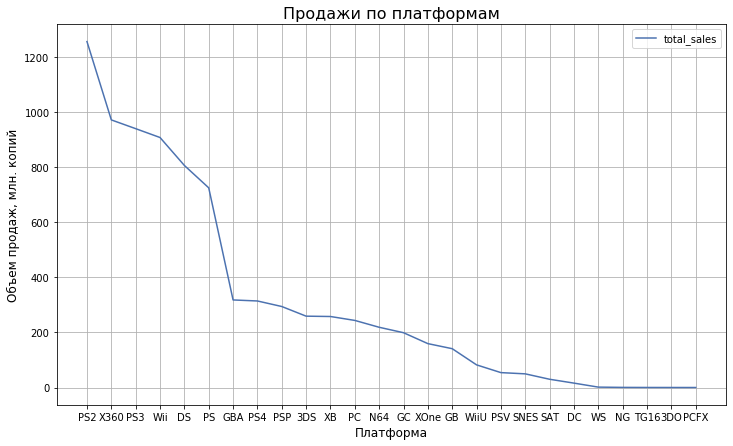

In [182]:
# Рассчитаем сумму продаж по платформам:
sales_platform = data_filt.pivot_table(index = 'platform', 
                                       values = 'total_sales', aggfunc = 'sum').sort_values(
                                       by = 'total_sales', ascending = False).reset_index()
display(sales_platform)

# Построим график продаж:
sales_platform.plot(x = 'platform',
                    y = 'total_sales',
                    figsize = (12,7),
                    grid = True)

plt.xticks(np.arange(len(sales_platform)), sales_platform['platform'])
plt.title('Продажи по платформам', fontsize=16)
plt.xlabel('Платформа', fontsize=12)
plt.ylabel('Объем продаж, млн. копий', fontsize=12)

Самые прибыльные платформы - с выручкой свыше 100 млн, остальные убыточные. Топ 5 - PS2, X360, PS3, Wii, DS.

In [183]:
# Удалим убыточные платформы:
data_filt = data_filt.set_index('platform')
data_filt = data_filt.drop(['WiiU','PSV','SNES','SAT','DC','WS','NG','TG16','3DO','PCFX'], axis = 0).reset_index()

In [184]:
# Рассчитаем сумму продаж по платформам и по годам:
sales_platform = data_filt.pivot_table(
    index = ['year_of_release','platform'], values = 'total_sales', 
    aggfunc = 'sum').reset_index().sort_values(by = 'year_of_release')

# Развернем полученную таблицу о продажах на платформах с даннными по годам:
sales_platform_pivot = sales_platform.pivot(index = 'platform', columns = 'year_of_release')
sales_platform_pivot

total_sales                                                 \
year_of_release        1995  1996   1997   1998   1999  2000   2001   2002   
platform                                                                     
3DS                     NaN   NaN    NaN    NaN    NaN   NaN    NaN    NaN   
DS                      NaN   NaN    NaN    NaN    NaN   NaN    NaN    NaN   
GB                     4.63 36.03   6.37  26.90  38.00 19.76   9.24    NaN   
GBA                     NaN   NaN    NaN    NaN    NaN  0.07  61.53  74.16   
GC                      NaN   NaN    NaN    NaN    NaN   NaN  26.34  51.81   
N64                     NaN 34.10  39.50  49.91  57.87 33.97   3.25   0.08   
PC                     4.22 10.58  11.27   3.26   4.74  4.66   5.47   8.57   
PS                    35.96 94.70 136.17 172.77 144.53 96.37  35.59   6.67   
PS2                     NaN   NaN    NaN    NaN    NaN 39.17 166.43 205.38   
PS3                     NaN   NaN    NaN    NaN    NaN   NaN    NaN    NaN   
PS4                     NaN   NaN    NaN    NaN    NaN   NaN    NaN    NaN   
PSP                     NaN   NaN    NaN    NaN    NaN   NaN    NaN    NaN   
Wii                     NaN   NaN    NaN    NaN    NaN   NaN    NaN    NaN   
X360                    NaN   NaN    NaN    NaN    NaN   NaN    NaN    NaN   
XB                      NaN   NaN    NaN    NaN    NaN  0.99  22.26  48.01   
XOne                    NaN   NaN    NaN    NaN    NaN   NaN    NaN    NaN   

                                                                         \
year_of_release   2003   2004   2005   2006   2007   2008   2009   2010   
platform                                                                  
3DS                NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
DS                 NaN  17.27 130.14 119.81 146.94 148.65 119.54  85.02   
GB                 NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
GBA              61.64  77.91  33.86   5.28   3.40    NaN    NaN    NaN   
GC               52.81  28.82  27.62  11.26   0.27    NaN    NaN    NaN   
N64                NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
PC                8.84  10.39   4.37   2.85   9.28  16.18  16.91  24.28   
PS                2.07    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
PS2             184.31 234.02 160.66 103.42  75.99  53.90  26.40   5.64   
PS3                NaN    NaN    NaN  20.96  73.19 118.52 130.93 150.48   
PS4                NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
PSP                NaN   7.06  43.84  55.32  46.93  39.07  37.78  35.04   
Wii                NaN    NaN    NaN 137.15 152.77 187.65 206.97 127.95   
X360               NaN    NaN   8.25  51.62  95.41 135.26 130.47 170.03   
XB               61.21  65.42  49.08  10.04   0.55   0.18    NaN    NaN   
XOne               NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   

                                                          
year_of_release   2011   2012   2013   2014   2015  2016  
platform                                                  
3DS              63.20  51.36  57.76  43.76  27.78 15.14  
DS               26.18  11.01   1.54    NaN    NaN   NaN  
GB                 NaN    NaN    NaN    NaN    NaN   NaN  
GBA                NaN    NaN    NaN    NaN    NaN   NaN  
GC                 NaN    NaN    NaN    NaN    NaN   NaN  
N64                NaN    NaN    NaN    NaN    NaN   NaN  
PC               35.03  23.22  12.38  13.28   8.52  5.25  
PS                 NaN    NaN    NaN    NaN    NaN   NaN  
PS2               0.45    NaN    NaN    NaN    NaN   NaN  
PS3             156.78 107.36 113.25  47.76  16.82  3.60  
PS4                NaN    NaN  25.99 100.00 118.90 69.25  
PSP              17.82   7.69   3.14   0.24   0.12   NaN  
Wii              59.65  21.71   8.59   3.75   1.14  0.18  
X360            143.84  99.74  88.58  34.74  11.96  1.52  
XB                 NaN    NaN    NaN    NaN    NaN   NaN  
XOne               NaN    NaN  18.96  54.07  

**Выводы:**
* В среднем платформа существует 10-11 лет. Новые платформы появляются в начале и середине десятилетий.
* За последнее время в продажах лидирует PS4, XOne и 3DS.
* Продажи игр на ПК росли до 2011 года, потом постепенно снизились до 5 млн. в 2016 г.
* Продажи упали также следующих платформ - PS3, 3DS, PSP, Wii, X360.
* В последнее десятилетие в топах продаж были PS3, X360, PS4, XOne, Wii, PSP, DS, PC, PS2, 3DS.
* Из актуальных можно выделить XOne, X360, Wii, PS4, PS3, PC, 3DS.

In [185]:
# Выделим только актуальные платформы:
actual_platform = sales_platform.set_index('platform')
actual_platform = actual_platform.drop(
    ['DS','GB','GBA','GC','N64','PS','PS2','PSP','XB'], axis = 0).reset_index()
actual_platform['platform'].unique()

array(['PC', 'X360', 'PS3', 'Wii', '3DS', 'PS4', 'XOne'], dtype=object)

Построим график «ящик с усами» по глобальным продажам игр в разбивке по актуальным платформам.

Text(0, 0.5, 'Объем продаж, млн. копий')

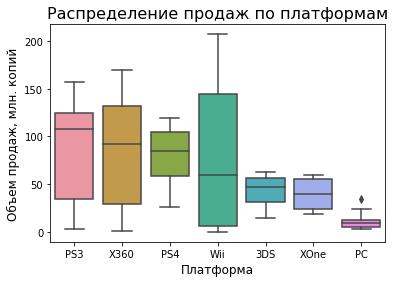

In [187]:
sns.boxplot(x="platform", y="total_sales", data=actual_platform_box, 
            order=["PS3", "X360", "PS4","Wii", "3DS","XOne","PC"])
plt.title("Распределение продаж по платформам", fontsize=16)
plt.xlabel("Платформа", fontsize=12)
plt.ylabel("Объем продаж, млн. копий", fontsize=12)

Из выборки актуальных платформ дольше всего продавалась платформа Wii, наибольших обьем продаж имеют PS3, PS4 и X360.

Рассмотрим, как влияют на продажи внутри популярной платформы PS3 отзывы пользователей и критиков. Построим диаграмму рассеяния и рассчитаем корреляцию между отзывами и продажами.

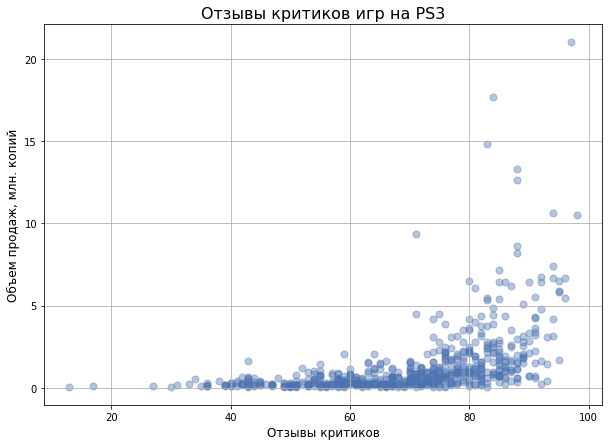

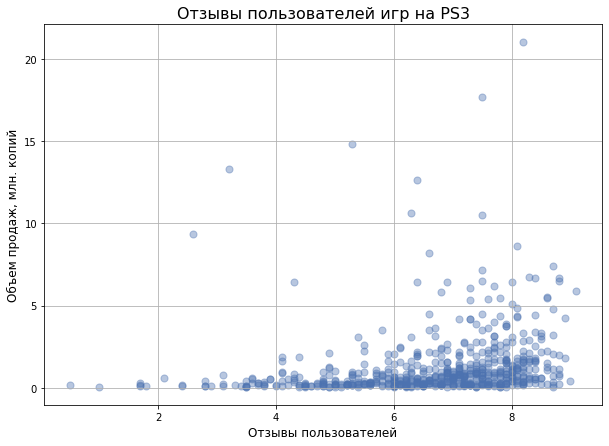

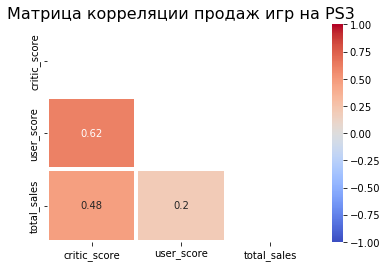

In [188]:
# Выделим данные только по платформе PS3:
ps3 = data_filt.query('platform == "PS3"')
ps3_pivot = ps3.pivot_table(index = ['critic_score','user_score'], values = 'total_sales', aggfunc = 'sum'
                           ).reset_index()

# Построим диаграмму рассеяния и рассчитаем корреляцию:
plt.style.use('seaborn-deep')
ps3_pivot.plot(kind = 'scatter',
              x = 'critic_score',
              y = 'total_sales',
              style = 'o-',
              alpha=0.4,
              figsize=(10,7),
              s=50,
              grid = True)
plt.title('Отзывы критиков игр на PS3', fontsize=16)
plt.xlabel('Отзывы критиков', fontsize=12)
plt.ylabel('Объем продаж, млн. копий', fontsize=12)

ps3_pivot.plot(kind = 'scatter',
              x = 'user_score',
              y = 'total_sales',
              style = 'o-',
              alpha=0.4,
              figsize=(10,7),
              s=50,
              grid = True)

plt.title('Отзывы пользователей игр на PS3', fontsize=16)
plt.xlabel('Отзывы пользователей', fontsize=12)
plt.ylabel('Объем продаж, млн. копий', fontsize=12)
plt.show()

matrix = np.triu(ps3_pivot.corr())
sns.heatmap(ps3_pivot.corr(), annot=True, mask=matrix, vmin=-1, vmax=1, center= 0, cmap= 'coolwarm', linewidths=3)
plt.title('Матрица корреляции продаж игр на PS3', fontsize=16)
plt.show()

Существует определенная кореляция между отзывами критиков и пользователей с обьемами продаж. Корреляция между отзывами критиков с продажами более высокая (0,47 к 0,20), те пользователи больше обращают внимание на отзывы критиков при выборе игры, чем на отзывы других пользователей. Соответственно компании следует обратить внимание на работу с критиками для повышения продаж.

Сравним эти данные с продажами игр на других платформах.

In [189]:
# Выделим данные только по платформам X360 и Wii:
x360 = data_filt.query('platform == "X360"')
x360_corr = x360.pivot_table(index = ['critic_score','user_score'], values = 'total_sales', aggfunc = 'sum'
                              ).reset_index()

wii = data_filt.query('platform == "Wii"')
wii_corr = wii.pivot_table(index = ['critic_score','user_score'], values = 'total_sales', aggfunc = 'sum'
                            ).reset_index()

Text(0.5, 1, 'Матрица корреляции продаж игр на X360')

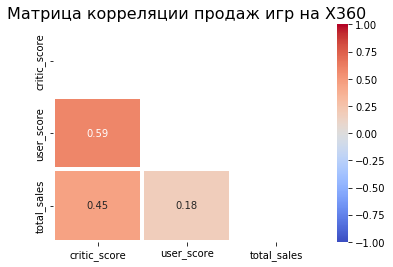

In [190]:
matrix = np.triu(x360_corr.corr())
sns.heatmap(x360_corr.corr(), annot=True, mask=matrix, vmin=-1, vmax=1, center= 0, cmap= 'coolwarm', linewidths=3)
plt.title('Матрица корреляции продаж игр на X360', fontsize=16)

Text(0.5, 1, 'Матрица корреляции продаж игр на Wii')

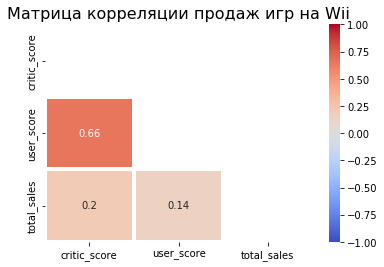

In [191]:
matrix = np.triu(wii_corr.corr())
sns.heatmap(wii_corr.corr(), annot=True, mask=matrix, vmin=-1, vmax=1, center= 0, cmap= 'coolwarm', linewidths=3)
plt.title('Матрица корреляции продаж игр на Wii', fontsize=16)

На X360 схожая ситуация, тк возможно игры одни и те же. Wii платформа для другой аудитории, корреляция низкая, возможно пользователи Wii не обращают внимание на отзывы других игроков при выборе игры.

Посмотрим в заключение на общее распределение игр по жанрам.

,genre,total_sales
0,Action,"1,631.43"
1,Sports,"1,259.09"
2,Shooter,961.60
3,Role-Playing,855.58
4,Misc,766.25
5,Racing,681.33
6,Platform,571.28
7,Fighting,384.86
8,Simulation,378.99
9,Adventure,202.35


,total_sales
count,12.00
mean,667.46
std,459.07
min,155.42
25%,334.83
50%,626.31
75%,882.09
max,"1,631.43"


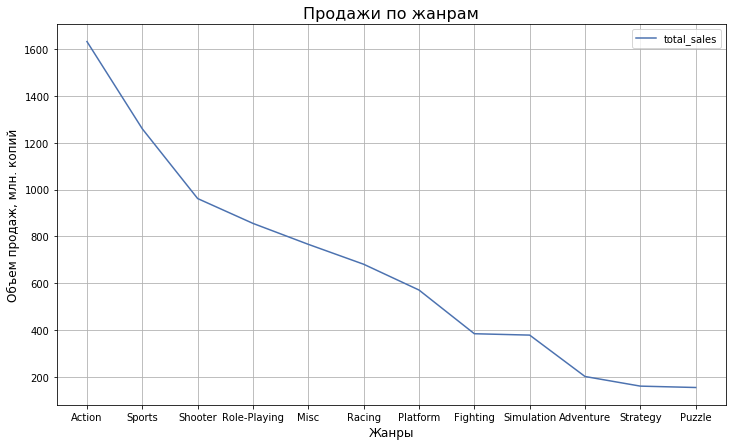

In [192]:
# Построим распределение игр по жанрам:
sales_genre = data_filt.pivot_table(index = 'genre', values = 'total_sales', aggfunc = 'sum').sort_values(
                                    by = 'total_sales', ascending = False).reset_index()

display(sales_genre)
display(sales_genre.describe())

# Построим график продаж по жанрам и топ-5:
sales_genre.plot(y = 'total_sales',
                 figsize = (12,7),
                 grid = True)

plt.xticks(np.arange(len(sales_genre)), sales_genre['genre'])
plt.title('Продажи по жанрам', fontsize=16)
plt.xlabel('Жанры', fontsize=12)
plt.ylabel('Объем продаж, млн. копий', fontsize=12)
plt.show()

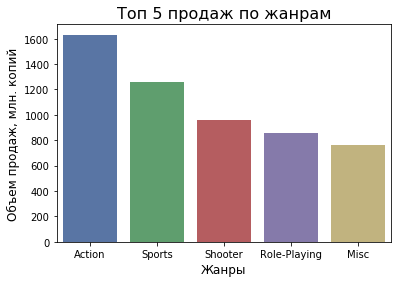

Text(0, 0.5, 'Объем продаж, млн. копий')

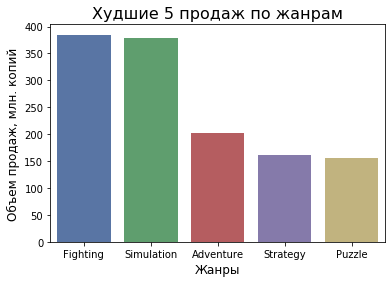

In [193]:
# Построим графики с лучшими и худшими 5-ю продажами по жанрам:
sns.barplot(data=sales_genre.head(), x="genre", y="total_sales")
plt.title('Топ 5 продаж по жанрам', fontsize=16)
plt.xlabel('Жанры', fontsize=12)
plt.ylabel('Объем продаж, млн. копий', fontsize=12)
plt.show()

sns.barplot(data=sales_genre.tail(), x="genre", y="total_sales")
plt.title('Худшие 5 продаж по жанрам', fontsize=16)
plt.xlabel('Жанры', fontsize=12)
plt.ylabel('Объем продаж, млн. копий', fontsize=12)

Самые прибыльные жанры - это экшен, спорт и шутеры, самые не прибыльные - приключения, стратегии и пазлы. 
Налицо явная кореляция, что больше всего приносят прибыль игры с экшеном. Сложные вроде стратегий и приключений игры не приносят большого дохода.

Среднее значение продаж составляет 667 млн. копий. Получается экшен и спорт перетягивают на себя большую часть продаж.

### Выводы

* Самые прибыльные платформы - с выручкой свыше 100 млн, остальные убыточные. Топ 5 - PS2, X360, PS3, Wii, DS.
* В среднем платформа существует 10-11 лет. Новые платформы появляются в начале и середине десятилетий.
* За последнее время в продажах лидирует PS4, XOne и 3DS.
* Продажи игр на ПК росли до 2011 года, потом постепенно снизились до 5 млн. в 2016 г.
* Продажи упали также следующих платформ - PS3, 3DS, PSP, Wii, X360.
* В последнее десятилетие в топах продаж были PS3, X360, PS4, XOne, Wii, PSP, DS, PC, PS2, 3DS.
* Из актуальных можно выделить XOne, X360, Wii, PS4, PS3, PC, 3DS.
* Из выборки актуальных платформ дольше всего продавалась платформа Wii, самые прибыльные PS3 и X360.
* Существует определенная кореляция между отзывами критиков и пользователей с обьемами продаж. Корреляция между отзывами критиков с продажами более высокая (0,47 к 0,20), те пользователи больше обращают внимание на отзывы критиков при выборе игры, чем на отзывы других пользователей. Соответственно компании следует обратить внимание на работу с критиками для повышения продаж. На X360 схожая ситуация, тк возможно игры одни и те же. Wii платформа для другой аудитории, корреляция низкая, возможно пользователи Wii не обращают внимание на отзывы других игроков при выборе игры.
* Самые прибыльные жанры - это экшен, спорт и шутеры, самые не прибыльные - приключения, стратегии и пазлы. Налицо явная кореляция, что больше всего приносят прибыль игры с экшеном. Сложные вроде стратегий и приключений игры не приносят большого дохода.

## Составление портрета пользователей

Определим для пользователя каждого региона (NA, EU, JP):
* Самые популярные платформы (топ-5). Опишите различия в долях продаж.
* Самые популярные жанры (топ-5). Поясните разницу.
* Влияет ли рейтинг ESRB на продажи в отдельном регионе?

In [194]:
# Создадим распределение топ-5 продаж платформ по регионам:
na_sales = data_filt.pivot_table(index = 'platform',  
                                 values = 'na_sales', aggfunc = 'sum').sort_values(
                                 by = 'na_sales', ascending = False).head().reset_index()

eu_sales = data_filt.pivot_table(index = 'platform',  
                                 values = 'eu_sales', aggfunc = 'sum').sort_values(
                                 by = 'eu_sales', ascending = False).head().reset_index()

jp_sales = data_filt.pivot_table(index = 'platform',  
                                 values = 'jp_sales', aggfunc = 'sum').sort_values(
                                 by = 'jp_sales', ascending = False).head().reset_index()

pd.concat([na_sales, eu_sales, jp_sales], axis=1)

,platform,na_sales,platform,eu_sales,platform,jp_sales
0,X360,602.47,PS2,339.29,DS,175.55
1,PS2,583.84,PS3,330.29,PS2,139.20
2,Wii,496.90,X360,270.76,PS,137.15
3,PS3,393.49,Wii,262.21,3DS,100.67
4,DS,382.40,PS,212.41,PS3,80.19


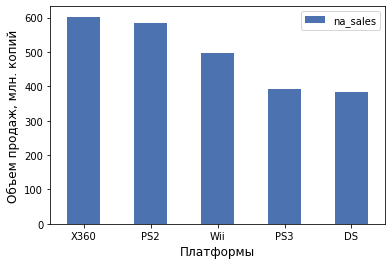

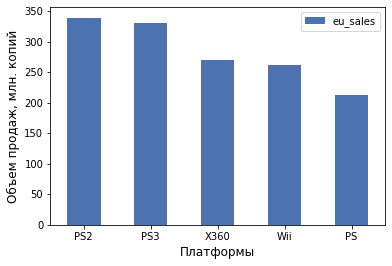

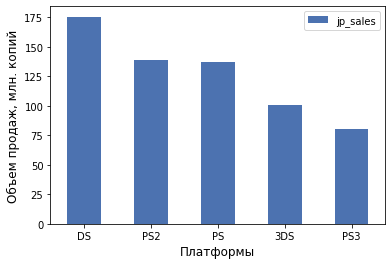

In [195]:
tables = [na_sales, eu_sales, jp_sales]

for i in tables:
    i = i.set_index('platform')
    i.plot.bar(rot=0)
    plt.xlabel('Платформы', fontsize=12)
    plt.ylabel('Объем продаж, млн. копий', fontsize=12)

В топах продаж есть определенная закономерность, которая зависит от региона:
* в США всегда популярна больше американская консоль Xbox,
* в Европе исторически популярна Playstation,
* в Японии всегда популярны консоли Nintendo и Sony.

In [196]:
# Создадим распределение топ-5 жанров по регионам:
na_sales = data_filt.pivot_table(index = 'genre',  
                                 values = 'na_sales', aggfunc = 'sum').sort_values(
                                 by = 'na_sales', ascending = False).head().reset_index()

eu_sales = data_filt.pivot_table(index = 'genre',  
                                 values = 'eu_sales', aggfunc = 'sum').sort_values(
                                 by = 'eu_sales', ascending = False).head().reset_index()

jp_sales = data_filt.pivot_table(index = 'genre',  
                                 values = 'jp_sales', aggfunc = 'sum').sort_values(
                                 by = 'jp_sales', ascending = False).head().reset_index()

pd.concat([na_sales, eu_sales, jp_sales], axis=1)

,genre,na_sales,genre,eu_sales,genre,jp_sales
0,Action,813.32,Action,499.98,Role-Playing,288.37
1,Sports,662.02,Sports,370.20,Action,138.28
2,Shooter,527.91,Shooter,307.61,Sports,93.83
3,Misc,393.95,Racing,228.00,Misc,93.09
4,Racing,339.19,Misc,206.36,Platform,64.19


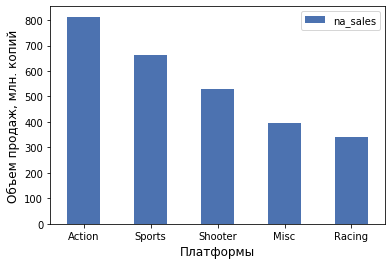

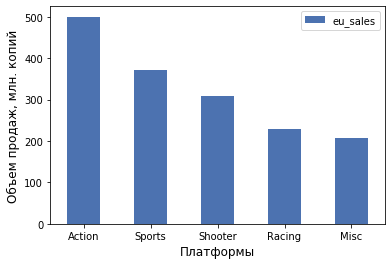

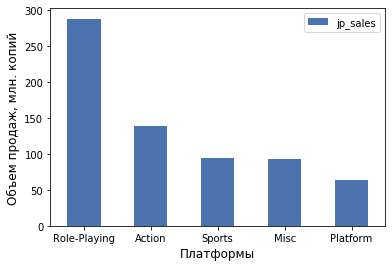

In [197]:
tables = [na_sales, eu_sales, jp_sales]

for i in tables:
    i = i.set_index('genre')
    i.plot.bar(rot=0)
    plt.xlabel('Платформы', fontsize=12)
    plt.ylabel('Объем продаж, млн. копий', fontsize=12)

Экшен практически везде на первом месте, следом идут спортивные игры и шутеры. Единственное отличие из трендов - в Японии на первом месте RPG за счет национальной особенности - там любят японские RPG.

In [198]:
# Создадим распределение топ-5 продаж по рейтингу по регионам:
na_sales = data_filt.pivot_table(index = 'rating',  
                                 values = 'na_sales', aggfunc = 'sum').sort_values(
                                 by = 'na_sales', ascending = False).head().reset_index()

eu_sales = data_filt.pivot_table(index = 'rating',  
                                 values = 'eu_sales', aggfunc = 'sum').sort_values(
                                 by = 'eu_sales', ascending = False).head().reset_index()

jp_sales = data_filt.pivot_table(index = 'rating',  
                                 values = 'jp_sales', aggfunc = 'sum').sort_values(
                                 by = 'jp_sales', ascending = False).head().reset_index()

pd.concat([na_sales, eu_sales, jp_sales], axis=1)

,rating,na_sales,rating,eu_sales,rating,jp_sales
0,E,"1,274.65",E,697.42,E,190.78
1,T,753.13,M,479.83,T,141.93
2,M,742.70,T,421.51,M,61.95
3,E10+,340.14,E10+,178.12,E10+,37.11
4,K-A,2.56,AO,0.61,K-A,1.46


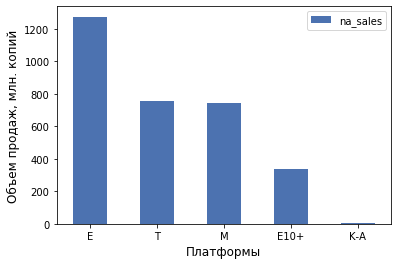

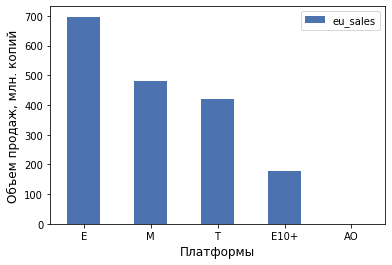

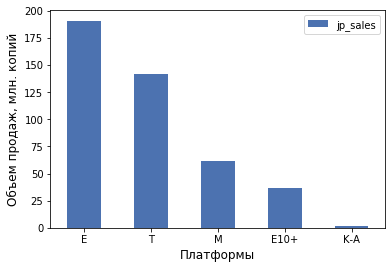

In [199]:
tables = [na_sales, eu_sales, jp_sales]

for i in tables:
    i = i.set_index('rating')
    i.plot.bar(rot=0)
    plt.xlabel('Платформы', fontsize=12)
    plt.ylabel('Объем продаж, млн. копий', fontsize=12)

Разницы между регионами нет. В топах рейтинги E (для всех возрастов), T (13+), M (17+).

### Выводы

* Топ 5 по платформам: в топах продаж есть определенная закономерность, которая зависит от региона:
    * в США всегда популярна больше американская консоль Xbox,
    * в Европе исторически популярна Playstation,
    * в Японии всегда популярны консоли Nintendo и Sony.
* Топ 5 по жанрам: экшен практически везде на первом месте, следом идут спортивные игры и шутеры. Единственное отличие из трендов - в Японии на первом месте RPG за счет национальной особенности - там любят японские RPG.
* Топ 5 по рейтингу ESRB: разницы между регионами нет. В топах рейтинги E (для всех возрастов), T (13+), M (17+).

## Проверка гипотез

Проверим следующие гипотезы:

1. Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.
2. Средние пользовательские рейтинги жанров Action и Sports разные.

In [200]:
# Выделим данные по Xbox One и PC и удалим пропуски:
xone = data_filt.query('platform == "XOne"')
pc = data_filt.query('platform == "PC"')
xone_stat = xone['user_score'].dropna()
pc_stat = pc['user_score'].dropna()

# Выделим данные по Action и Sports и удалим пропуски:
action = data_filt.query('genre == "Action"')
sports = data_filt.query('genre == "Sports"')
action_stat = action['user_score'].dropna()
sports_stat = sports['user_score'].dropna()

Text(0, 0.5, 'Количество')

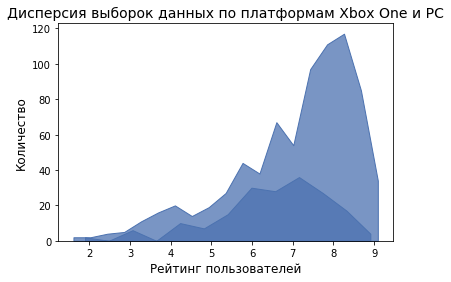

In [201]:
# Проверим дисперсии выборок, чтобы корректно определить атрибут equal_val в Т–тесте:
sns.histplot(data=xone_stat, element="poly")
sns.histplot(data=pc_stat, element="poly")
plt.title('Дисперсия выборок данных по платформам Xbox One и PC', fontsize=14)
plt.xlabel('Рейтинг пользователей', fontsize=12)
plt.ylabel('Количество', fontsize=12)

Дисперсии выборок отличаются.

Text(0, 0.5, 'Количество')

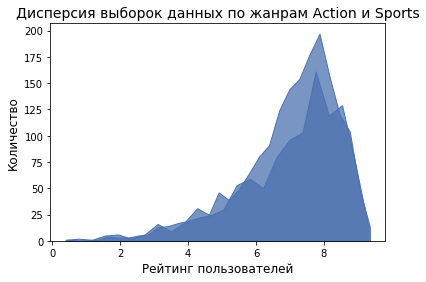

In [202]:
sns.histplot(data=action_stat, element="poly")
sns.histplot(data=sports_stat, element="poly")
plt.title('Дисперсия выборок данных по жанрам Action и Sports', fontsize=14)
plt.xlabel('Рейтинг пользователей', fontsize=12)
plt.ylabel('Количество', fontsize=12)

Дисперсии выборок практически одинаковы.

In [207]:
# Проверим утверждения: 
# Нулевая гипотеза: средние рейтинги равны.
# Альтернативная гипотеза: они отличаются.

# Создадим фукнцию:
def hypotize(stat1, stat2, equal):
    alpha = .05 # Установим стандартное значение критического уровня статистической значимости

    results1 = st.ttest_ind(stat1, stat2, equal_var = equal) #дисперсии рейтнга по платформам отличаются.

    print('p-значение: ', results1.pvalue)

    if results1.pvalue < alpha:
        print("Отвергаем нулевую гипотезу")
    else:
        print("Не получилось отвергнуть нулевую гипотезу")
        
print("Гипотеза: Средние пользовательские рейтинги платформ Xbox One и PC отличаются")
display(hypotize(xone_stat, pc_stat, False))
print("Гипотеза: Средние пользовательские рейтинги жанров Action и Sports разные.")
display(hypotize(action_stat, sports_stat, True))

Гипотеза: Средние пользовательские рейтинги платформ Xbox One и PC отличаются
p-значение:  3.7683151429117218e-06
Отвергаем нулевую гипотезу


None

Гипотеза: Средние пользовательские рейтинги жанров Action и Sports разные.
p-значение:  0.16654937226729746
Не получилось отвергнуть нулевую гипотезу


None

### Выводы

* Средние пользовательские рейтинги платформ Xbox One и PC отличаются.
* Средние пользовательские рейтинги жанров Action и Sports одинаковые.

## Общий вывод

При построении модели расчета прогноза продаж на 2017 год следует учесть следующие определяющие успешность игры закономерности:

1. Выбор платформы для игр:
* В среднем платформа для игр существует 10-11 лет. Новые платформы появляются в начале и середине десятилетий. **При выборе платформы следует учесть, срок жизни и размер аудитории консоли.**
* За последнее время в продажах лидирует PS4, XOne и 3DS. Из актуальных платформ можно выделить XOne, X360, Wii, PS4, PS3, PC, 3DS. Из выборки актуальных платформ дольше всего продавалась платформа Wii, самые прибыльные PS3 и X360. Средние пользовательские рейтинги платформ Xbox One и PC отличаются. **Следует учесть, что PS3 и X360 хорошо продались и имеют большую аудиторию, также что PS4 и XOne новые платформы, которые набирают популярность.**
* Продажи игр на ПК росли до 2011 года, потом постепенно снизились до 5 млн. в 2016 г. **ПК не следует рассматривать как основную платформу для игр, только как дополнительную.**

2. Повышение продвижения игр:
* Существует определенная кореляция между отзывами критиков и пользователей с обьемами продаж. Корреляция между отзывами критиков с продажами более высокая (0,47 к 0,20), те пользователи больше обращают внимание на отзывы критиков при выборе игры, чем на отзывы других пользователей. Соответственно компании следует обратить внимание на работу с критиками для повышения продаж. На X360 схожая ситуация, тк возможно игры одни и те же. Wii платформа для другой аудитории, корреляция низкая, возможно пользователи Wii не обращают внимание на отзывы других игроков при выборе игры. 
* **Следует сконцентрировать внимание на критиках и обеспечением их подарочными копиями игры и другими плюшками для повышения рейтинга игры среди критиков.**

3. Выбор жанра для игр:
* Самые прибыльные жанры - это экшен, спорт и шутеры, самые не прибыльные - приключения, стратегии и пазлы. Налицо явная кореляция, что больше всего приносят прибыль игры с экшеном. Сложные вроде стратегий и приключений игры не приносят большого дохода. Средние пользовательские рейтинги жанров Action и Sports разные. 
* **Лучше выбрать из топ-3 жанров - экшен, спорт и шутеры.**

4. Выбор платформы, жанра и целевой аудитории с учетом региона:
* Топ 5 по платформам: в топах продаж есть определенная закономерность, которая зависит от региона:
    * в США всегда популярна больше американская консоль Xbox,
    * в Европе исторически популярна Playstation,
    * в Японии всегда популярны консоли Nintendo и Sony.
* Топ 5 по жанрам: экшен практически везде на первом месте, следом идут спортивные игры и шутеры. Единственное отличие из трендов - в Японии на первом месте RPG за счет национальной особенности - там любят японские RPG.
* Топ 5 по рейтингу ESRB: разницы между регионами нет. В топах рейтинги E (для всех возрастов), T (13+), M (17+).
* **Необходимо учесть любимые платформы и жанры в регионах, а также чтобы игра была доступна для всех возврастов.**